In [24]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [25]:
onecall = True  # 8 days
#onecall = False # 5 days

In [26]:
# Headers to mimic the browser 
headers = { 
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' 
}

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(url = base_url, headers = headers).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [27]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(url = base_url, headers = headers).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [28]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [29]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,rain,uvi
0,05/09,07:13,20:25,09:34,21:09,0.07,"{'day': 15.3, 'min': 15.22, 'max': 19.65, 'nig...","{'day': 15.31, 'night': 15.42, 'eve': 15.78, '...",1009,93,14.18,4.41,286,10.31,"[{'id': 502, 'main': 'Rain', 'description': 'h...",100,1.00,36.67,0.86
1,06/09,07:14,20:23,10:40,21:22,0.10,"{'day': 21.47, 'min': 14.38, 'max': 24.16, 'ni...","{'day': 20.93, 'night': 19.77, 'eve': 22.92, '...",1011,48,9.98,4.23,115,8.38,"[{'id': 804, 'main': 'Clouds', 'description': ...",88,0.00,NaN,4.83
2,07/09,07:16,20:21,11:49,21:37,0.13,"{'day': 24.64, 'min': 17.59, 'max': 28.4, 'nig...","{'day': 24.52, 'night': 17.62, 'eve': 19.13, '...",1008,52,14.08,4.65,128,10.97,"[{'id': 502, 'main': 'Rain', 'description': 'h...",76,1.00,16.11,3.76
3,08/09,07:17,20:18,12:59,21:55,0.16,"{'day': 17.08, 'min': 15.38, 'max': 18.13, 'ni...","{'day': 16.93, 'night': 16.46, 'eve': 16.95, '...",1007,80,13.48,7.22,183,14.27,"[{'id': 500, 'main': 'Rain', 'description': 'l...",98,1.00,5.54,3.43
4,09/09,07:19,20:16,14:11,22:18,0.19,"{'day': 18.65, 'min': 15.76, 'max': 19.96, 'ni...","{'day': 18.61, 'night': 16.35, 'eve': 18, 'mor...",1006,78,14.55,5.22,210,11.54,"[{'id': 501, 'main': 'Rain', 'description': 'm...",83,1.00,12.84,0.58
5,10/09,07:20,20:14,15:23,22:51,0.22,"{'day': 16.52, 'min': 15.31, 'max': 18.51, 'ni...","{'day': 16.13, 'night': 16.68, 'eve': 17.85, '...",1010,73,11.38,5.55,257,12.38,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,0.95,3.05,1.00
6,11/09,07:22,20:12,16:30,23:37,0.25,"{'day': 16.22, 'min': 12.56, 'max': 17.89, 'ni...","{'day': 15.49, 'night': 12.76, 'eve': 14.15, '...",1004,61,8.35,6.50,206,14.61,"[{'id': 501, 'main': 'Rain', 'description': 'm...",95,1.00,10.83,1.00
7,12/09,07:23,20:10,17:29,01:00,0.29,"{'day': 16.83, 'min': 10.61, 'max': 16.83, 'ni...","{'day': 15.85, 'night': 12.95, 'eve': 13.97, '...",1012,49,5.88,5.62,248,11.09,"[{'id': 500, 'main': 'Rain', 'description': 'l...",20,1.00,2.37,1.00


In [30]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'rain', 'uvi'],
       dtype='object'),
 19)

In [31]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            06/09
sunrise       07:14
sunset        20:23
moonrise      10:40
moonset       21:22
moon_phase      0.1
pressure       1011
humidity         48
dew_point      9.98
wind_speed     4.23
wind_deg        115
wind_gust      8.38
pop             0.0
rain            NaN
uvi            4.83
Name: 1, dtype: object

In [32]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17, 18])

In [33]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV


dt                                                        05/09
sunrise                                                   07:13
sunset                                                    20:25
moonrise                                                  09:34
moonset                                                   21:09
moon_phase                                                 0.07
temp          {'day': 15.3, 'min': 15.22, 'max': 19.65, 'nig...
feels_like    {'day': 15.31, 'night': 15.42, 'eve': 15.78, '...
pressure                                                   1009
humidity                                                     93
dew_point                                                 14.18
wind_speed                                                 4.41
wind_deg                                                    286
wind_gust                                                 10.31
weather       [{'id': 502, 'main': 'Rain', 'description': 'h...
clouds                                  

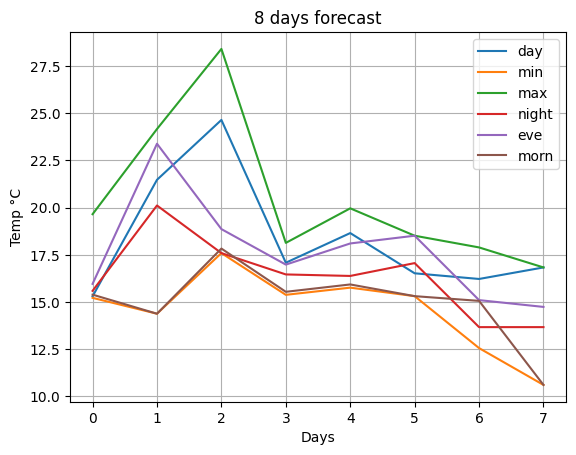

In [34]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [35]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(url = base_url, headers = headers).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1725526800, 'main': {'temp': 15.44, 'feels_like': 15.55, 'temp_min': 15.44, 'temp_max': 15.83, 'pressure': 1008, 'sea_level': 1008, 'grnd_level': 998, 'humidity': 96, 'temp_kf': -0.39}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'clouds': {'all': 100}, 'wind': {'speed': 3.3, 'deg': 287, 'gust': 7.27}, 'visibility': 3168, 'pop': 1, 'rain': {'3h': 20.41}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-09-05 09:00:00'}, {'dt': 1725537600, 'main': {'temp': 15.23, 'feels_like': 15.24, 'temp_min': 15.22, 'temp_max': 15.23, 'pressure': 1008, 'sea_level': 1008, 'grnd_level': 999, 'humidity': 93, 'temp_kf': 0.01}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'clouds': {'all': 100}, 'wind': {'speed': 4.1, 'deg': 282, 'gust': 10.07}, 'visibility': 10000, 'pop': 1, 'rain': {'3h': 8.57}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-09-05 12:00:0

In [36]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1725526800
main          {'temp': 15.44, 'feels_like': 15.55, 'temp_min...
weather       [{'id': 502, 'main': 'Rain', 'description': 'h...
clouds                                             {'all': 100}
wind                   {'speed': 3.3, 'deg': 287, 'gust': 7.27}
visibility                                                 3168
pop                                                         1.0
rain                                              {'3h': 20.41}
sys                                                {'pod': 'd'}
dt_txt                                      2024-09-05 09:00:00
Name: 0, dtype: object


In [37]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'rain',
       'sys', 'dt_txt'],
      dtype='object')

In [38]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   05/09 11:00  11:00     15.83     15.44
1   05/09 14:00  14:00     15.23     15.22
2   05/09 17:00  17:00     16.55     16.55
3   05/09 20:00  20:00     15.75     15.75
4   05/09 23:00  23:00     15.59     15.59
5   06/09 02:00  02:00     15.35     15.35
6   06/09 05:00  05:00     14.74     14.74
7   06/09 08:00  08:00     14.50     14.50
8   06/09 11:00  11:00     18.66     18.66
9   06/09 14:00  14:00     22.63     22.63
10  06/09 17:00  17:00     24.16     24.16
11  06/09 20:00  20:00     22.45     22.45
12  06/09 23:00  23:00     20.11     20.11
13  07/09 02:00  02:00     19.04     19.04
14  07/09 05:00  05:00     18.19     18.19
15  07/09 08:00  08:00     17.77     17.77
16  07/09 11:00  11:00     21.06     21.06
17  07/09 14:00  14:00     26.42     26.42
18  07/09 17:00  17:00     26.81     26.81
19  07/09 20:00  20:00     19.35     19.35
20  07/09 23:00  23:00     17.59     17.59
21  08/09 02:00  02:00     16.82     16.82
22  08/09 0

In [39]:
_5days['human_date']

0     05/09 11:00
1     05/09 14:00
2     05/09 17:00
3     05/09 20:00
4     05/09 23:00
5     06/09 02:00
6     06/09 05:00
7     06/09 08:00
8     06/09 11:00
9     06/09 14:00
10    06/09 17:00
11    06/09 20:00
12    06/09 23:00
13    07/09 02:00
14    07/09 05:00
15    07/09 08:00
16    07/09 11:00
17    07/09 14:00
18    07/09 17:00
19    07/09 20:00
20    07/09 23:00
21    08/09 02:00
22    08/09 05:00
23    08/09 08:00
24    08/09 11:00
25    08/09 14:00
26    08/09 17:00
27    08/09 20:00
28    08/09 23:00
29    09/09 02:00
30    09/09 05:00
31    09/09 08:00
32    09/09 11:00
33    09/09 14:00
34    09/09 17:00
35    09/09 20:00
36    09/09 23:00
37    10/09 02:00
38    10/09 05:00
39    10/09 08:00
Name: human_date, dtype: object

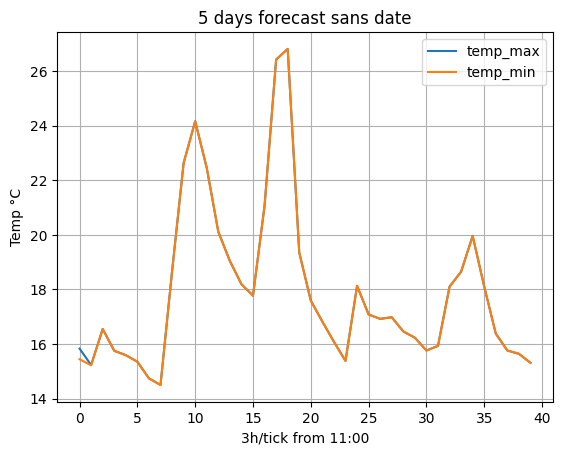

In [40]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [41]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

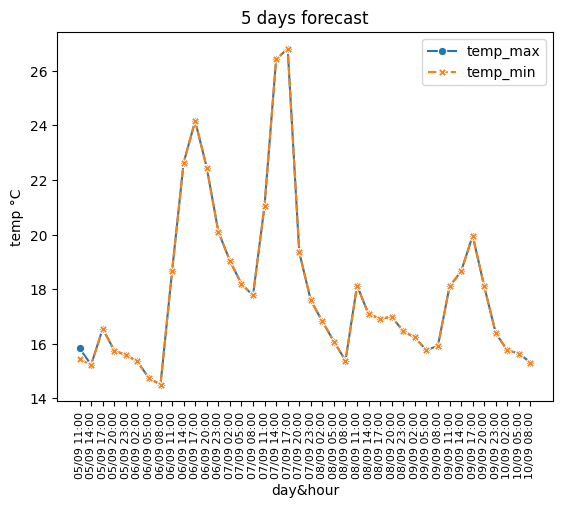

In [42]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

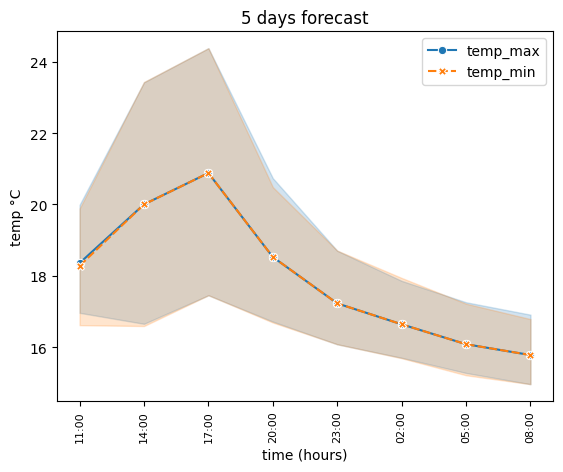

In [43]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 